In [22]:
import requests

url = "https://archive-api.open-meteo.com/v1/era5"
params = {
    "latitude": 30.0444,  # Latitude for Cairo
    "longitude": 31.2357,  # Longitude for Cairo
    "start_date": "2010-01-01",  # Start date
    "end_date": "2014-12-31",    # End date
    "daily": ["temperature_2m_max", "temperature_2m_min", "precipitation_sum"],
    "timezone": "Africa/Cairo"
}

response = requests.get(url, params=params)
weather_data = response.json()

import pandas as pd

daily_weather = pd.DataFrame(weather_data['daily'])
daily_weather['year'] = pd.to_datetime(daily_weather['time']).dt.year
annual_weather = daily_weather.groupby('year').agg({
    'temperature_2m_max': 'mean',
    'temperature_2m_min': 'mean',
    'precipitation_sum': 'sum'
}).reset_index()


In [31]:
# Electricity usage data
electricity_data = pd.DataFrame({
    "year": [2010, 2011, 2012, 2013, 2014],
    "electricity_usage_per_capita": [1494.91567642949, 1597.54387592635, 1596.46426709158, 1595.17418952174, 1592.21989414129
]
})

# Population data
population_data = pd.DataFrame({
    "year": [2010, 2011, 2012, 2013, 2014],
    "population": [87252413, 89200054, 91240376, 93377890, 95592324]
})

# natural gas production data
Production_data = pd.DataFrame({
    "year": [2010, 2011, 2012, 2013, 2014],
    "electricity_production": [76.5, 79.7, 76, 73.5, 71.7]
})

# Merge all data
df = electricity_data.merge(annual_weather, on='year').merge(population_data, on='year').merge(Production_data, on='year')

# Print the combined DataFrame
print(df)


   year  electricity_usage_per_capita  temperature_2m_max  temperature_2m_min  \
0  2010                   1494.915676           30.495342           16.406027   
1  2011                   1597.543876           28.220000           14.974795   
2  2012                   1596.464267           29.139071           15.517486   
3  2013                   1595.174190           29.379726           15.401644   
4  2014                   1592.219894           29.562192           15.812329   

   precipitation_sum  population  electricity_production  
0                9.4    87252413                    76.5  
1               22.0    89200054                    79.7  
2               11.7    91240376                    76.0  
3               11.0    93377890                    73.5  
4                8.8    95592324                    71.7  


In [39]:
features = df[['temperature_2m_max', 'temperature_2m_min', 'precipitation_sum', 'population', 'electricity_production']]
target = df['electricity_usage_per_capita']


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

predictions = model.predict(features)
mse = mean_squared_error(target, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 183.41485229549818


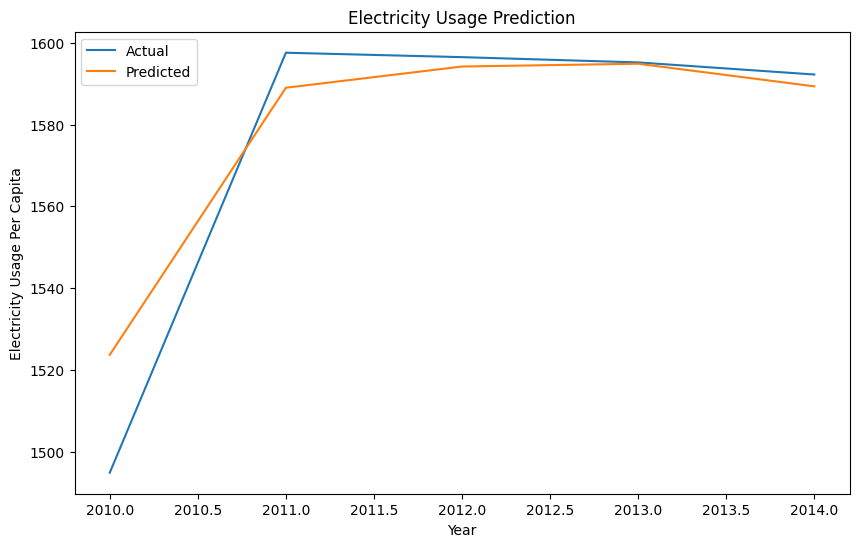

In [41]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(df['year'], target, label='Actual')
plt.plot(df['year'], predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Electricity Usage Per Capita')
plt.title('Electricity Usage Prediction')
plt.legend()
plt.show()


In [27]:
from datetime import datetime

current_date = datetime.now().strftime('%Y-%m-%d')

url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 30.0444,  # Latitude for Cairo
    "longitude": 31.2357,  # Longitude for Cairo
    "daily": ["temperature_2m_max", "temperature_2m_min", "precipitation_sum"],
    "timezone": "Africa/Cairo",
    "start_date": current_date,
    "end_date": current_date,
}

response = requests.get(url, params=params)
weather_data = response.json()

current_weather = {
    "temperature_2m_max": weather_data['daily']['temperature_2m_max'][0],
    "temperature_2m_min": weather_data['daily']['temperature_2m_min'][0],
    "precipitation_sum": weather_data['daily']['precipitation_sum'][0],
}

current_weather_df = pd.DataFrame([current_weather])

# Add population for the current year
current_population = 95592324
current_weather_df['population'] = current_population

print(current_weather_df)


   temperature_2m_max  temperature_2m_min  precipitation_sum  population
0                38.8                24.2                0.0    95592324


In [28]:
# Predict electricity usage using the current weather and population data
current_prediction = model.predict(current_weather_df)

print(f'Predicted Electricity Usage Per Capita: {current_prediction[0]}')


Predicted Electricity Usage Per Capita: 1535.0725508731603
